# Loan Application status project

### Data description

This dataset includes details of applicants who have applied for loan. The dataset includes details of Loan_ID, Gender, Married
,Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, Loan_Amount, Loan_Amount_Term, Credit History and Property_Area. These are the independent datas. The dependent data in the dataset is for the Loan status, We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

## Importing libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [102]:
df= pd.read_csv('loan_application.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [54]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We can see all the columns here. Loan_Status is our target column.

The column 'Loan ID' play no part in model building,so we will drop the column.

In [103]:
df.drop(['Loan_ID'], axis=1, inplace= True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## EDA

In [56]:
df.shape

(614, 12)

In the dataset we have 614 rows and 12 columns.

### Checking null values

In [57]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Here we can see certain null values in the dataset, lets visualize it.

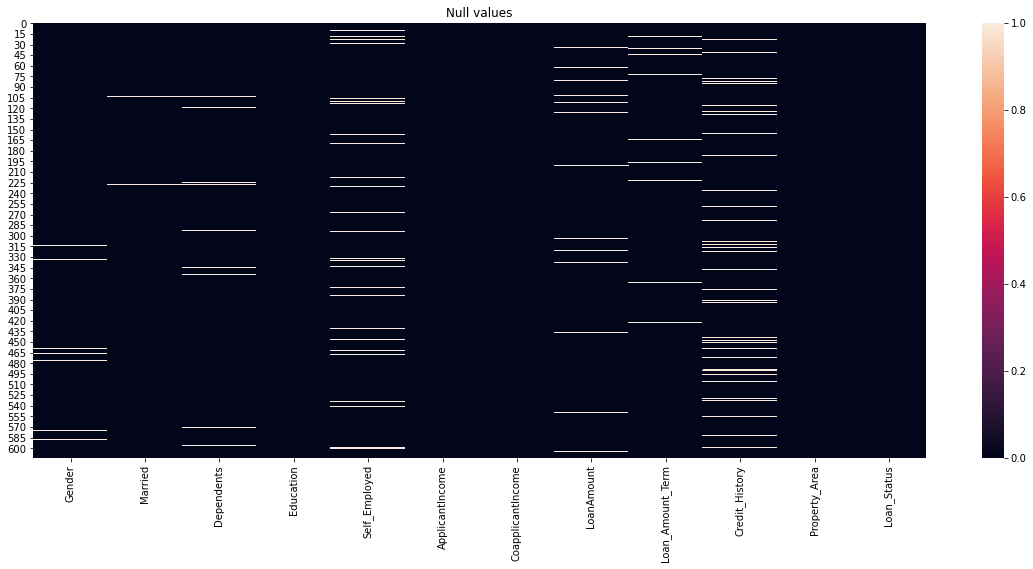

In [58]:
plt.figure(figsize=[20,8])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

By visualization we can also see most of the columns having null values.

In [59]:
# checking unique value count.

print(df.nunique())

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64


In [60]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

We can check, most the columns have categorical type data. Lets treat them for null values.

In [104]:
# replacing null values with most frequent data for caterogical columns.


colms=['Gender', 'Married', 'Dependents', 'Self_Employed','Loan_Amount_Term', 'Credit_History']

from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy= 'most_frequent')
for i in df[colms]:
    df[i]= imp.fit_transform(df[i].values.reshape(-1,1)) 

Null values are removed for caterogical data. lets treat the continious data.

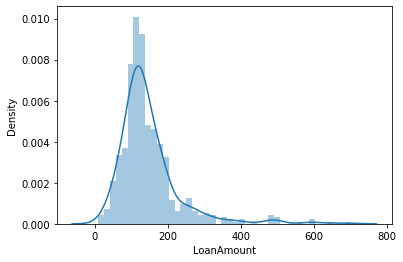

In [62]:
sns.distplot(df['LoanAmount']);

In this data we can see certain skewness, so replacing the null values with the median will be a better option.

In [105]:
imp1= SimpleImputer(missing_values= np.nan, strategy='median')

df['LoanAmount']= imp1.fit_transform(df['LoanAmount'].values.reshape(-1,1))

In [64]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Null values have been removed.

In [65]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Majority of the columns have object type data.

In [66]:
# Lets check the unique values

for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].unique())

Gender
['Male' 'Female']
Married
['No' 'Yes']
Dependents
['0' '1' '2' '3+']
Education
['Graduate' 'Not Graduate']
Self_Employed
['No' 'Yes']
ApplicantIncome
[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860
  6277  2577  9166  2281  3254 39999  95

All the object datatype columns are categorical, lets encode them.

### Encoding

In [106]:
col=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

In [107]:
from sklearn.preprocessing import LabelEncoder

enc= LabelEncoder()

for i in df[col]:
    df[i]= enc.fit_transform(df[i].values.reshape(-1,1))

In [108]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,8,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,8,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,8,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,8,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,8,1,0,1
610,1,1,3,0,0,4106,0.0,40.0,5,1,0,1
611,1,1,1,0,0,8072,240.0,253.0,8,1,2,1
612,1,1,2,0,0,7583,0.0,187.0,8,1,2,1


Our dataframe has been encoded.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    int64  
 9   Credit_History     614 non-null    int64  
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(2), int32(7), int64(3)
memory usage: 40.9 KB


Now our all the data is turned into int and float datatype. we can work with it now.

In [71]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,7.667752,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,1.109224,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,8.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,8.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,8.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,9.000000,1.000000,2.000000,1.000000


All columns have the same count, and in the continious data columns, there is some difference between the mean and median. so data can have skewness in the columns. Also some big difference can be seen between the mean and the maximum value, there is the posibility of having outliers.

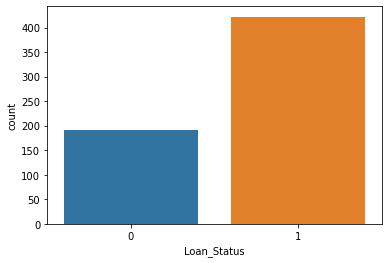

In [72]:
# checking for class imbalance

sns.countplot(df['Loan_Status'])

Here 0 is for Not approved and 1 is for Yes approved. we can see little imbalance but it is in considerable amount. Lets proceed.

## Visualization

<function matplotlib.pyplot.show(*args, **kw)>

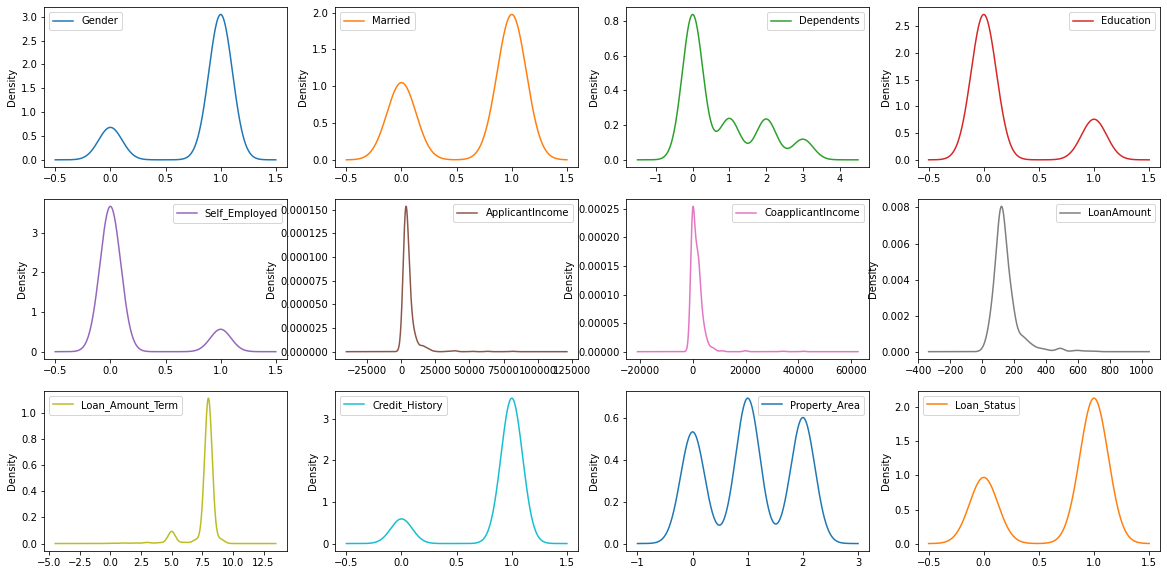

In [73]:
df.plot(kind='density', subplots= True, layout=(3,4),sharex=False, legend=True, figsize=[20,10])
plt.show

We can see the distribution of all the columns in the dataset. lets look at them closely.

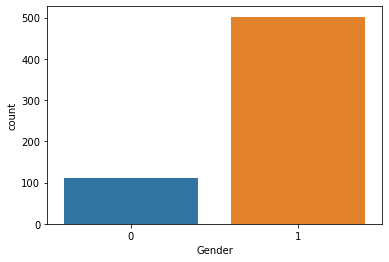

In [74]:
sns.countplot(df['Gender']);

There are more male applicants than female.

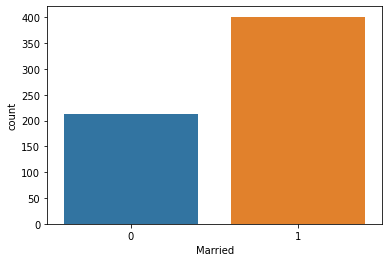

In [75]:
sns.countplot(df['Married']);

Count of married applicants is more compared to unmarried.

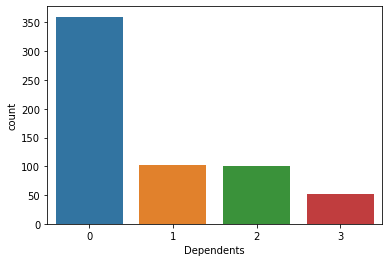

In [76]:
sns.countplot(df['Dependents']);

Most applicants have no dependents and very less have 3 or 3+ dependents.

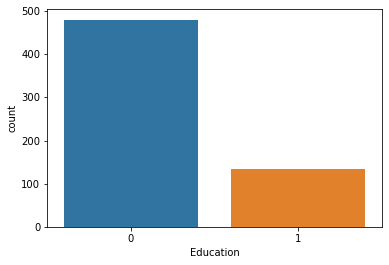

In [77]:
sns.countplot(df['Education']);

More applicants are graduate compared to non graduate

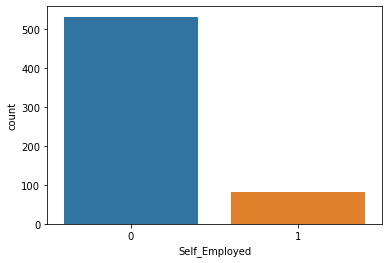

In [78]:
sns.countplot(df['Self_Employed']);

Verly less amount of applicants are self employed, majority are not.

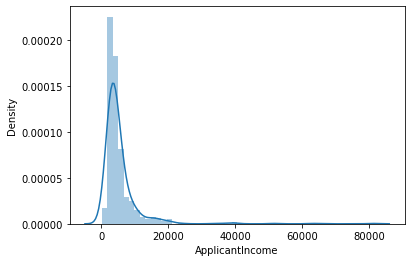

In [79]:
sns.distplot(df['ApplicantIncome']);

Data is normally distributed at beginning and very skewed at the end (right tailed skewed).

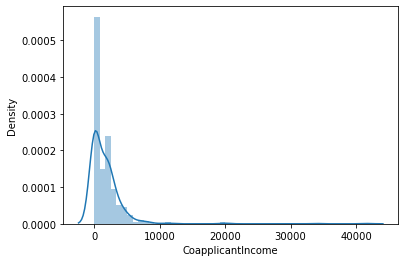

In [80]:
sns.distplot(df['CoapplicantIncome']);

Here too data has skewness present, right tailed skewed.

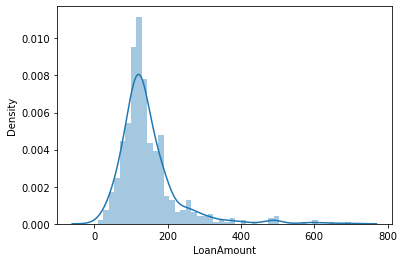

In [81]:
sns.distplot(df['LoanAmount']);

Data here has a normal distribution at the beginning and certain skewness at the end.

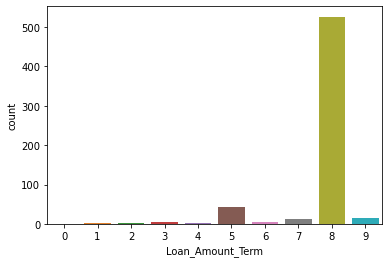

In [82]:
sns.countplot(df['Loan_Amount_Term']);

Here the term for 360 has maximum number of applications.

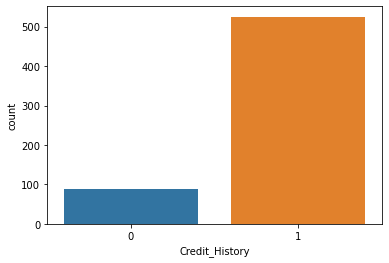

In [83]:
sns.countplot(df['Credit_History']);

We can see most of the applicants have a credit history.

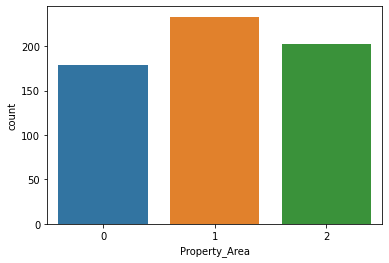

In [84]:
sns.countplot(df['Property_Area']);

There is certain balance between the property area, but majority of the area is for sub-urban area.

### Checking correlation

In [85]:
cor= df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.065494,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.082642,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.096377,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.076414,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.029184,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.038808,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.052472,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.037691,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.065494,-0.082642,-0.096377,-0.076414,-0.029184,-0.038808,-0.052472,0.037691,1.000000,-0.002379,-0.086578,-0.005679
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.002379,1.000000,0.001963,0.540556


Here we can see the correlation between all the columns, lets visualize it.

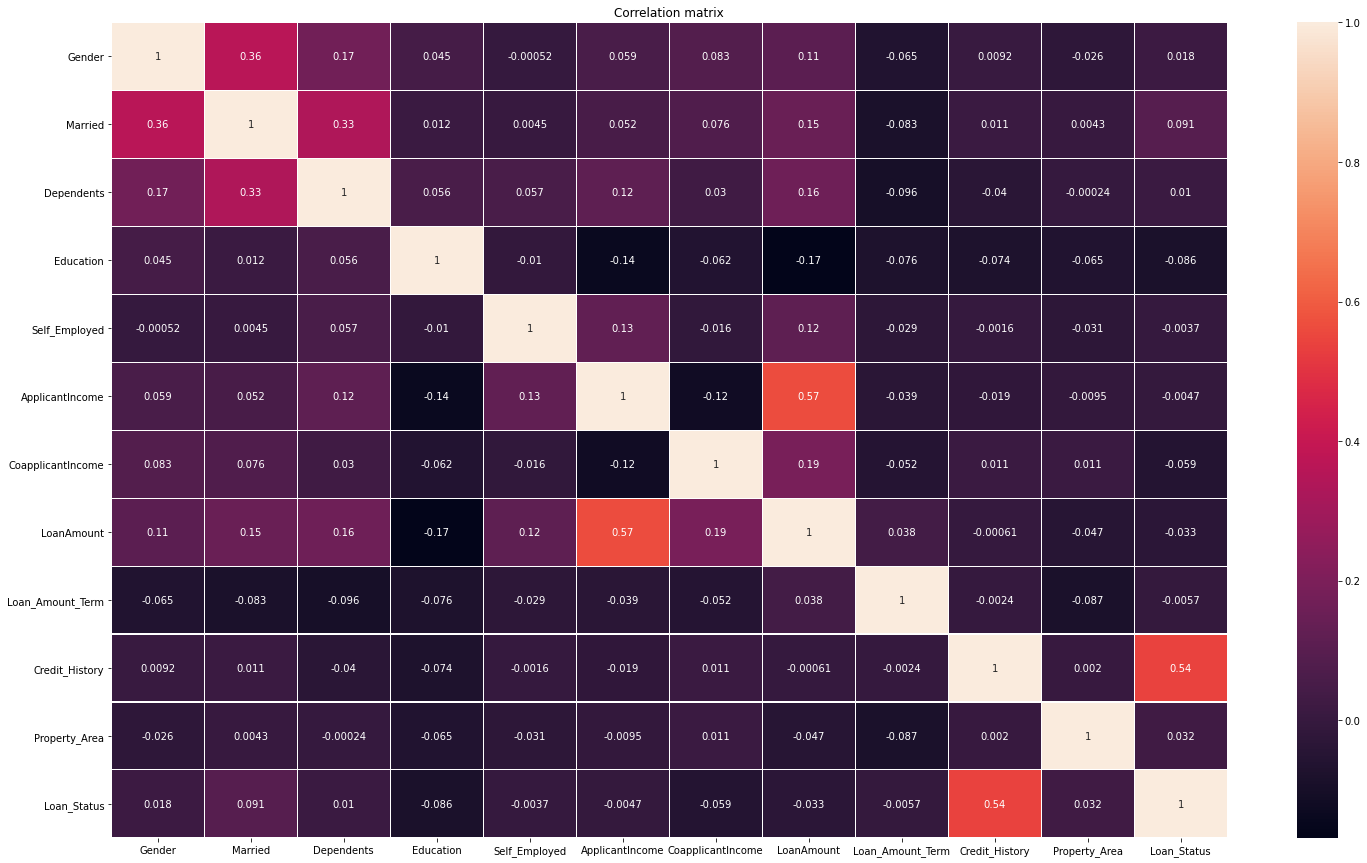

In [86]:
plt.figure(figsize=[25,15])
sns.heatmap(cor, annot=True,linewidth=0.1);
plt.title('Correlation matrix')
plt.show()

We can see most of the correlations having a weak relation, with very few good correlations. Among independent columns 'Applicant income' and 'Loan amount' have the most strong correlation. With 'Loan amount' and 'Education' having the most negative correlation.

In [87]:
# checking correlation of target with independent columns.

cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.005679
LoanAmount          -0.033214
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

We can check the correlation of our target with the independent columns. lets visualize it for better understanding.

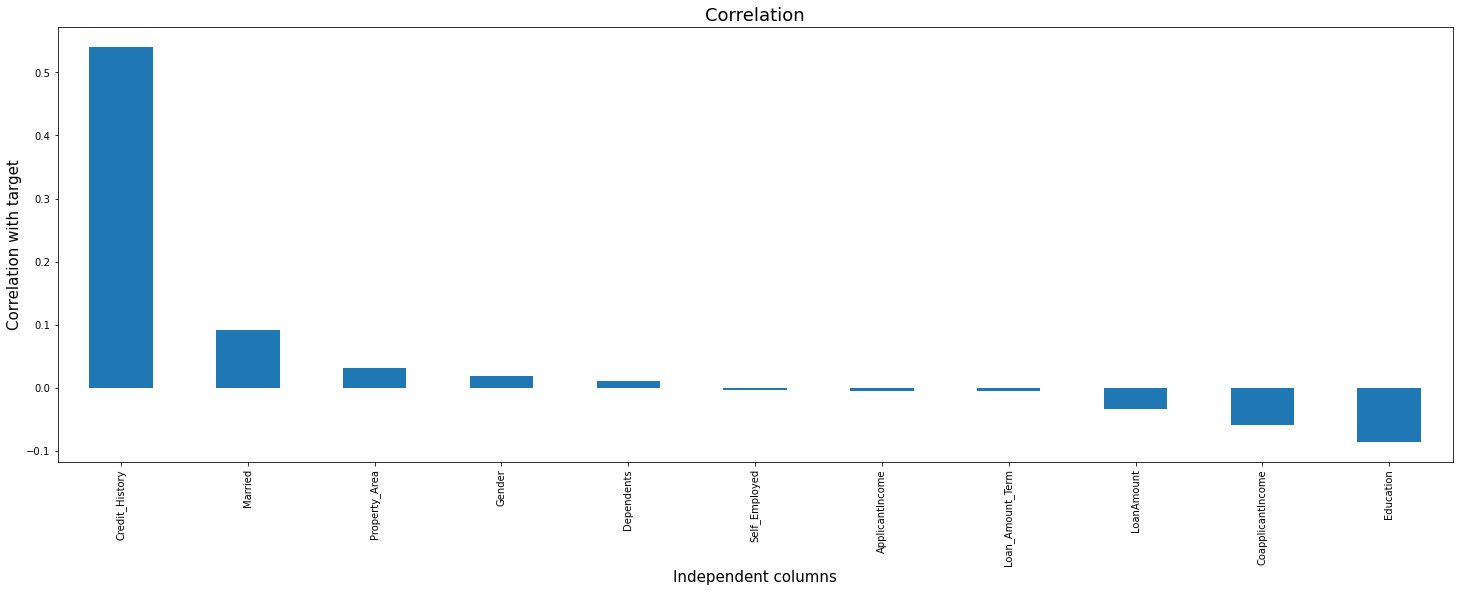

In [88]:
plt.figure(figsize=(25,8))
cor['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar')
plt.xlabel('Independent columns',fontsize= 15)
plt.ylabel('Correlation with target',fontsize= 15)
plt.title('Correlation',fontsize= 18)
plt.show()

We can see with the visualization that the 'credit history' is showing a very good correlation with the target, this is understandable as more positive credit history present, more is the chance of loan being approved. this is followed by 'Married'. 'Education' column has the least correlation with the target followed by 'Coapplicant Income' 

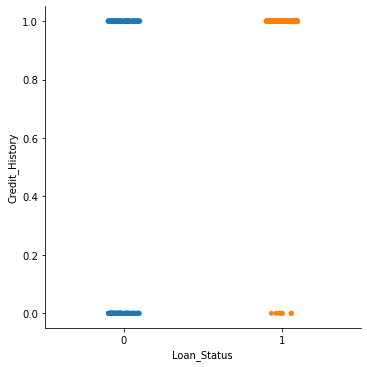

In [89]:
sns.catplot(x= 'Loan_Status',y='Credit_History', data=df)

A positive correlation can be seen, as data points are going up.

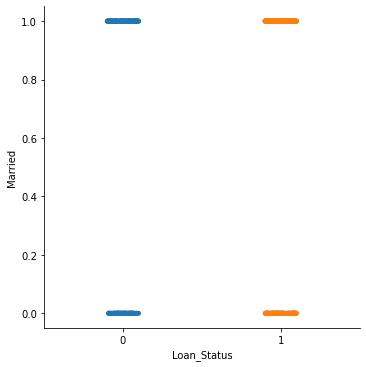

In [90]:
sns.catplot(x= 'Loan_Status',y='Married', data=df)

very less correlation.

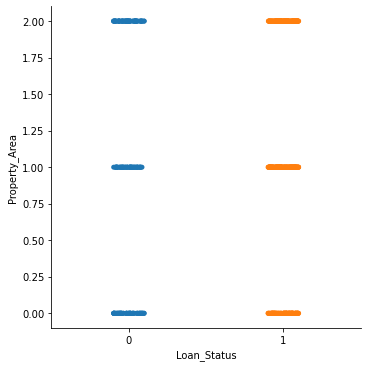

In [91]:
sns.catplot(x= 'Loan_Status',y='Property_Area', data=df)

Not a good correlation

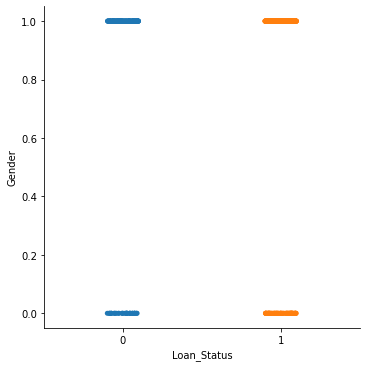

In [92]:
sns.catplot(x= 'Loan_Status',y='Gender', data=df)

No correlation can be seen.

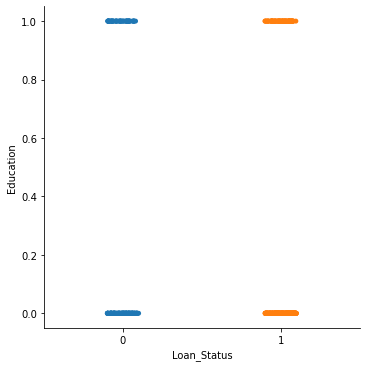

In [93]:
sns.catplot(x='Loan_Status',y='Education', data=df)

A slight negative correlation, points descreasing from top at the end.

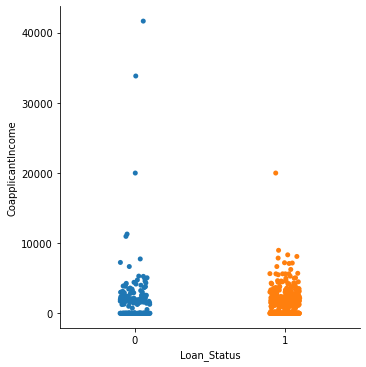

In [94]:
sns.catplot(x='Loan_Status',y='CoapplicantIncome', data=df)

A slightly negative correlation,data points going down.

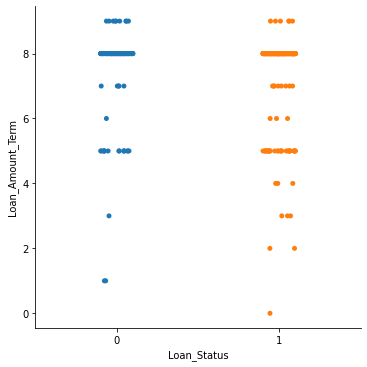

In [95]:
sns.catplot(x='Loan_Status',y='Loan_Amount_Term', data=df)

No correlation can be seen.

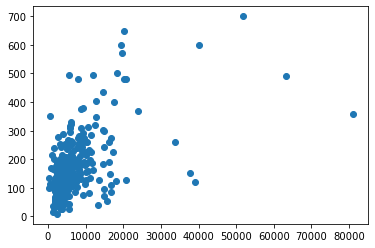

In [96]:
plt.scatter(df['ApplicantIncome'],df['LoanAmount'])
plt.show()

Graph shows the most positive correlation among the independent columns.

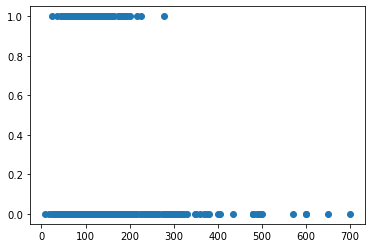

In [98]:
plt.scatter(df['LoanAmount'],df['Education'])
plt.show()

The graph shows the most negative correlation among the independent columns.

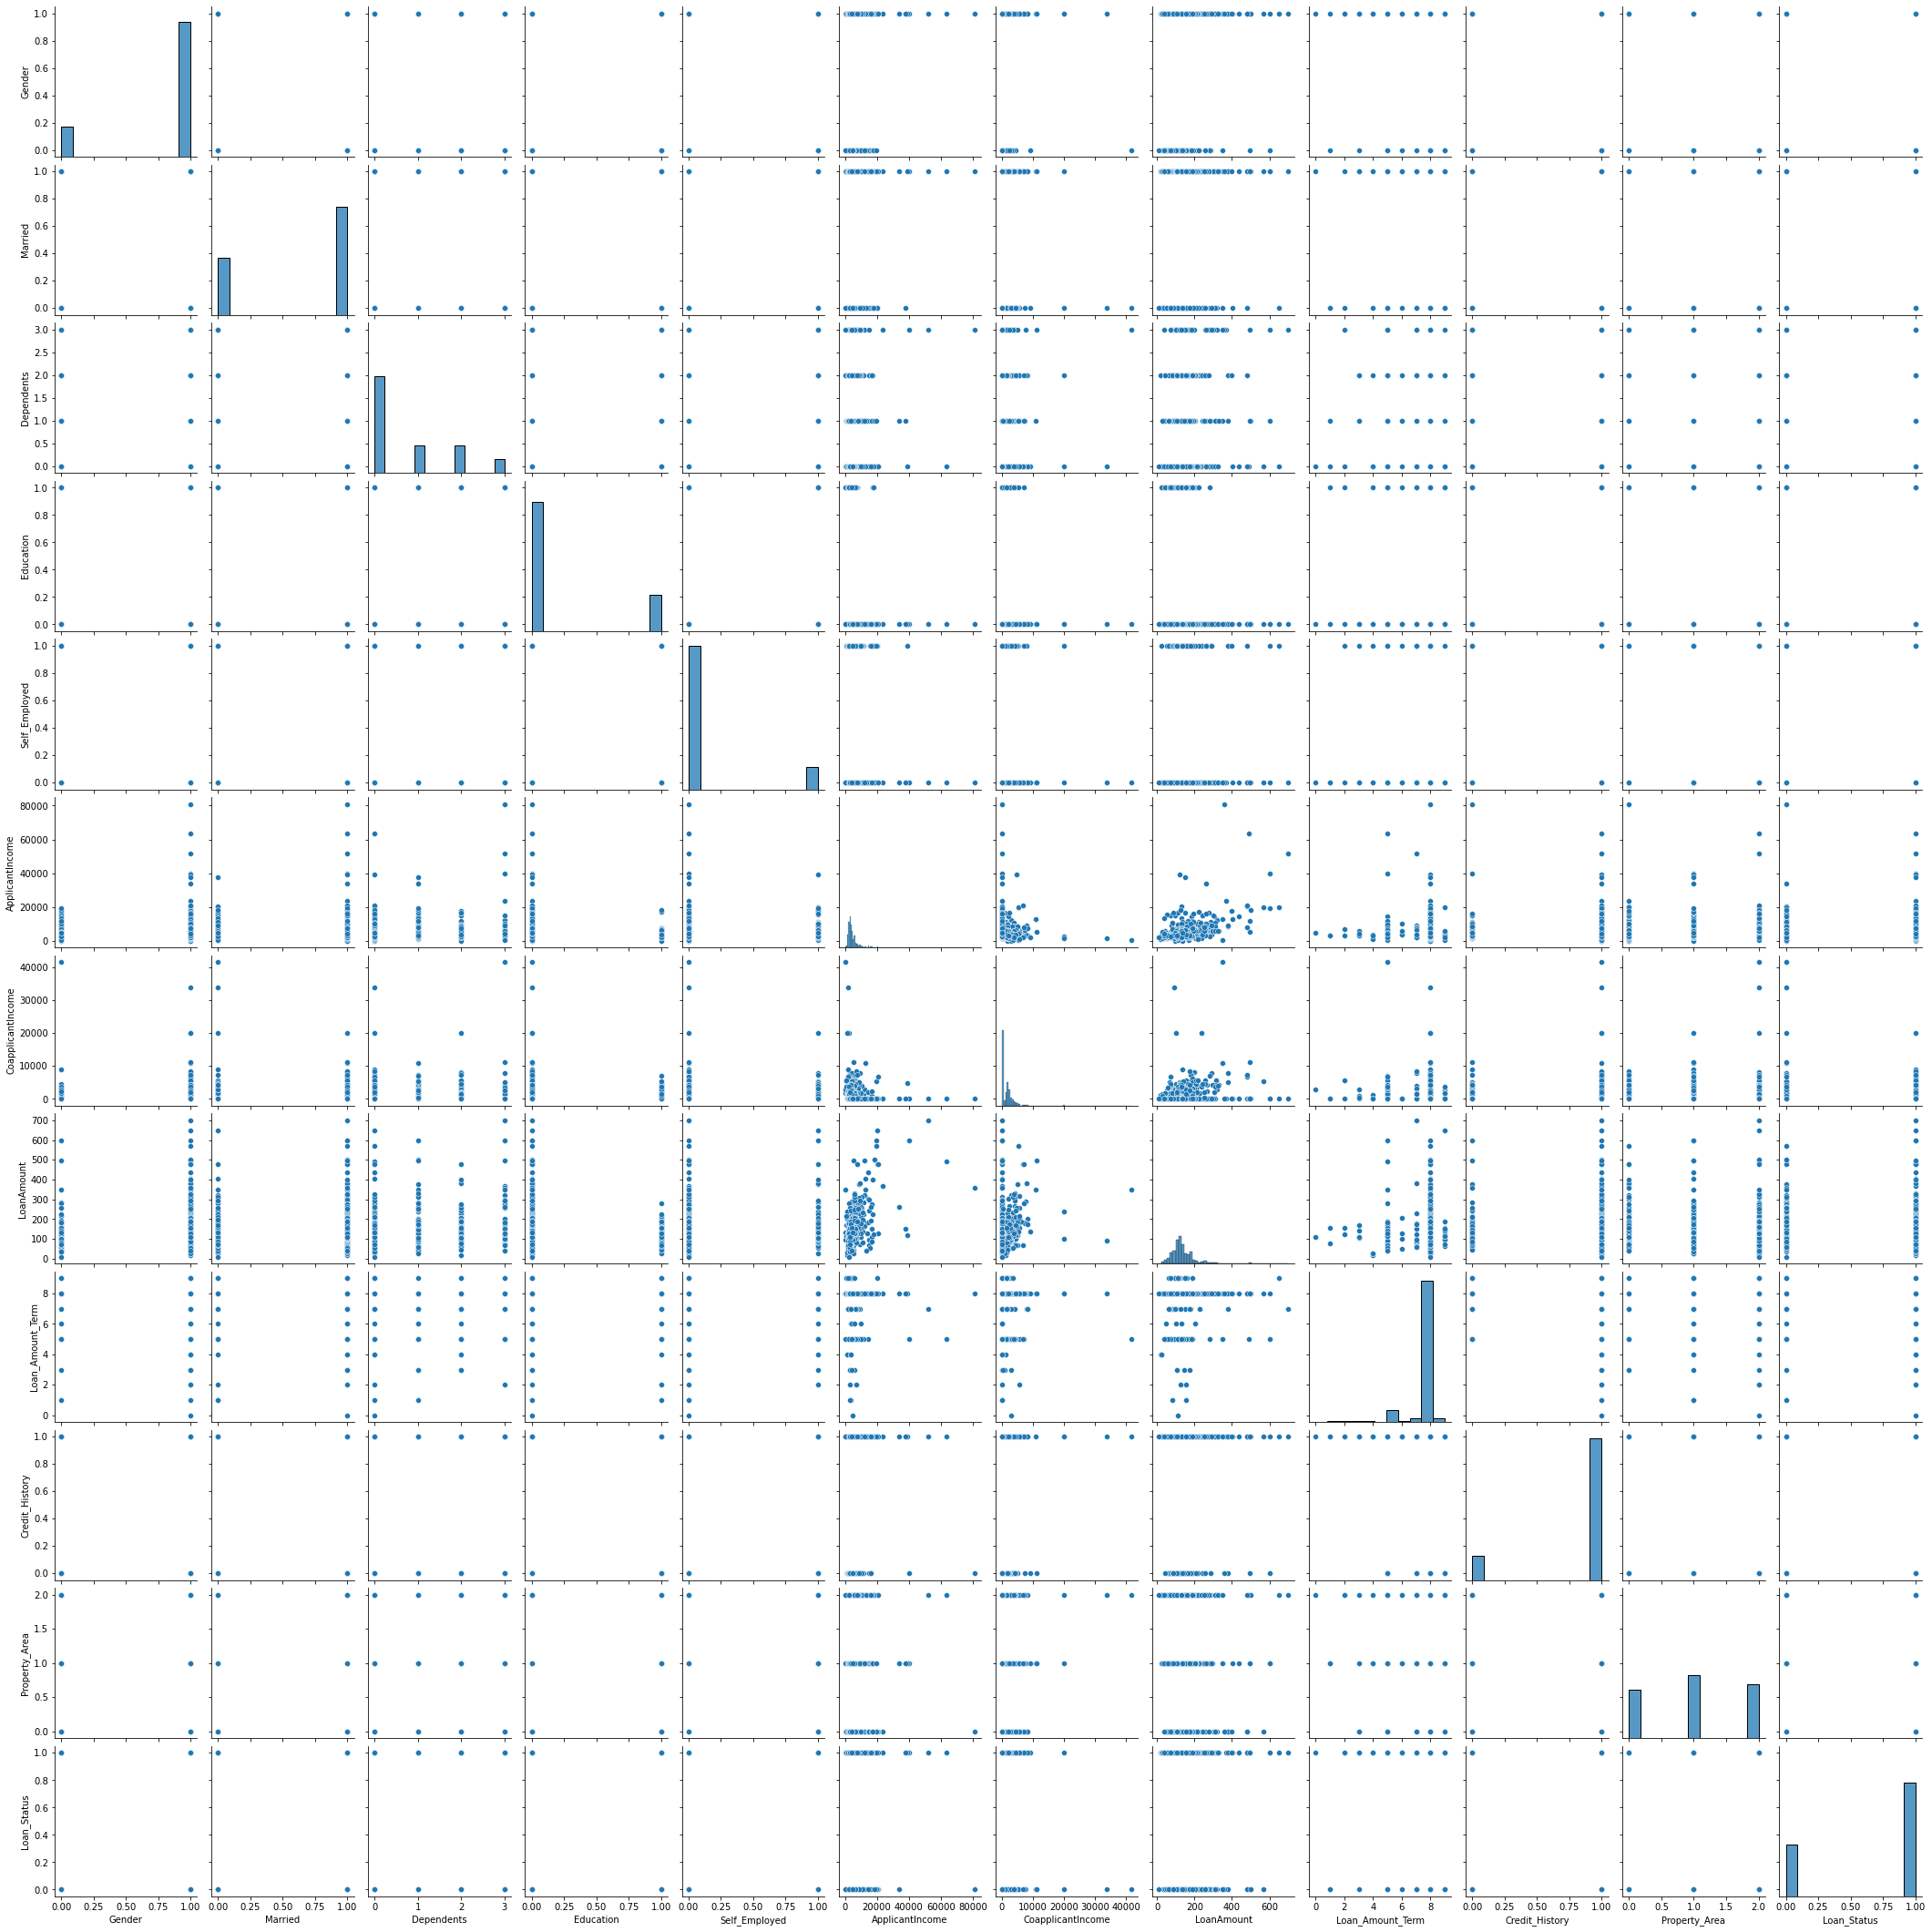

In [99]:
sns.pairplot(df);

Here we have visualized the correlation of the entire dataset. a multivariate analysis.

### Checking skewness for the continious data column

In [109]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -3.316702
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [119]:
# treating the continious columns for skewness.

from sklearn.preprocessing import power_transform

concol=['ApplicantIncome','CoapplicantIncome','LoanAmount' ]

for i in df[concol]:
    if df[i].skew()>0.5:
        df[i]= power_transform(df[i].values.reshape(-1,1))
        
    if df[i].skew()<-0.5:
        df[i]= power_transform(df[i].values.reshape(-1,1))

df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.020831
Loan_Amount_Term    -3.316702
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

We have removed the skewness for the continious data columns, taking threshold of (<0.5 & >-0.5)

## Finding best random state

In [120]:
# Lets split the data first into x and y first.

x=df.drop('Loan_Status', axis=1)
y= df['Loan_Status']

In [121]:
from sklearn.linear_model import LogisticRegression

maxscr=0
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.25,random_state=i)
    lr= LogisticRegression()
    lr.fit(x_train,y_train)
    predlr= lr.predict(x_test)
    scr= accuracy_score(y_test,predlr)
    if scr>maxscr:
        maxscr=scr
        maxrs= i
print('Best score: ', maxscr,'on random state', maxrs)

Best score:  0.8766233766233766 on random state 63


In [122]:
# Creating train test split using best random state

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.25,random_state=63)

## Model creation

In [123]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
predlr= lr.predict(x_test)
print(accuracy_score(y_test,predlr),'\n')
print(confusion_matrix(y_test,predlr),'\n')
print(classification_report(y_test,predlr),'\n')

0.8766233766233766 

[[ 27  19]
 [  0 108]] 

              precision    recall  f1-score   support

           0       1.00      0.59      0.74        46
           1       0.85      1.00      0.92       108

    accuracy                           0.88       154
   macro avg       0.93      0.79      0.83       154
weighted avg       0.90      0.88      0.87       154
 



In [124]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt= dt.predict(x_test)
print(accuracy_score(y_test,preddt),'\n')
print(confusion_matrix(y_test,preddt),'\n')
print(classification_report(y_test,preddt),'\n')

0.6558441558441559 

[[26 20]
 [33 75]] 

              precision    recall  f1-score   support

           0       0.44      0.57      0.50        46
           1       0.79      0.69      0.74       108

    accuracy                           0.66       154
   macro avg       0.62      0.63      0.62       154
weighted avg       0.69      0.66      0.67       154
 



In [125]:
from sklearn.ensemble import RandomForestClassifier

fr=RandomForestClassifier()
fr.fit(x_train,y_train)
predfr= fr.predict(x_test)
print(accuracy_score(y_test,predfr),'\n')
print(confusion_matrix(y_test,predfr),'\n')
print(classification_report(y_test,predfr),'\n')

0.8571428571428571 

[[ 27  19]
 [  3 105]] 

              precision    recall  f1-score   support

           0       0.90      0.59      0.71        46
           1       0.85      0.97      0.91       108

    accuracy                           0.86       154
   macro avg       0.87      0.78      0.81       154
weighted avg       0.86      0.86      0.85       154
 



In [126]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train,y_train)
preds= svc.predict(x_test)
print(accuracy_score(y_test,preds),'\n')
print(confusion_matrix(y_test,preds),'\n')
print(classification_report(y_test,preds),'\n')

0.8701298701298701 

[[ 26  20]
 [  0 108]] 

              precision    recall  f1-score   support

           0       1.00      0.57      0.72        46
           1       0.84      1.00      0.92       108

    accuracy                           0.87       154
   macro avg       0.92      0.78      0.82       154
weighted avg       0.89      0.87      0.86       154
 



In [127]:
from sklearn.ensemble import AdaBoostClassifier

ad= AdaBoostClassifier()
ad.fit(x_train,y_train)
predad= ad.predict(x_test)
print(accuracy_score(y_test,predad),'\n') 
print(confusion_matrix(y_test,predad),'\n')
print(classification_report(y_test,predad))

0.8506493506493507 

[[ 29  17]
 [  6 102]] 

              precision    recall  f1-score   support

           0       0.83      0.63      0.72        46
           1       0.86      0.94      0.90       108

    accuracy                           0.85       154
   macro avg       0.84      0.79      0.81       154
weighted avg       0.85      0.85      0.84       154



Here all the models except decision tree are giving us good accuracy and f1 scores. Lets check cv score for over and under fitting.

## Cross validation

In [133]:
from sklearn.model_selection import cross_val_score

scr= cross_val_score(lr,x,y,scoring="f1",cv=5)
print('cross validation score for logistic reg model: ', scr.mean())

cross validation score for logistic reg model:  0.8766952317357394


In [134]:
scr= cross_val_score(dt,x,y,scoring="f1",cv=5)
print('cross validation score for decision tree model: ', scr.mean())

cross validation score for decision tree model:  0.805014631047315


In [135]:
scr= cross_val_score(fr,x,y,scoring="f1",cv=5)
print('cross validation score for random forest model: ', scr.mean())

cross validation score for random forest model:  0.8516644545931988


In [136]:
scr= cross_val_score(svc,x,y,scoring="f1",cv=5)
print('cross validation score for support vector classifier model: ', scr.mean())

cross validation score for support vector classifier model:  0.8766952317357394


In [137]:
scr= cross_val_score(ad,x,y,scoring="f1",cv=5)
print('cross validation score for Adaboost reg model: ', scr.mean())

cross validation score for Adaboost reg model:  0.8543296739398354


Here all the models are giving us a good cv score, and the difference of cv score and f1 scores is nearly same in all the models except decision tree. lets hyperparameter tune them and find the best model.

## Hyper parameter tuning

In [138]:
# logistic regression

from sklearn.model_selection import GridSearchCV

par1={'penalty' : ['l1', 'l2', 'elasticnet','criterion']}

gcvlr= GridSearchCV(lr,par1,cv=5)
gcvlr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'criterion']})

In [139]:
gcvlr.best_params_

{'penalty': 'l2'}

In [145]:
# Now using the above parameter which is found to be best, we create our model.

lr_mod= LogisticRegression(penalty= 'l2', random_state=63)
lr_mod.fit(x_train,y_train)
predf1=lr_mod.predict(x_test)

print(accuracy_score(y_test,predf1))
print(confusion_matrix(y_test,predf1),'\n')
print(classification_report(y_test,predf1),'\n')

0.8766233766233766
[[ 27  19]
 [  0 108]] 

              precision    recall  f1-score   support

           0       1.00      0.59      0.74        46
           1       0.85      1.00      0.92       108

    accuracy                           0.88       154
   macro avg       0.93      0.79      0.83       154
weighted avg       0.90      0.88      0.87       154
 



With Logistic reg., we are getting an f1 score of 74% and 92% for 0 and 1, and accuracy score of 87%.

In [146]:
# Random forest model

par2={'max_depth':np.arange(1,10), 'criterion':['gini','entropy'], 'max_features' : ["auto", "sqrt", "log2"]}

gcvfr= GridSearchCV(fr,par2,cv=5)
gcvfr.fit(x_train,y_train)
gcvfr.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'}

In [147]:
# Now we create our model, using the best parameters.

fr_mod= RandomForestClassifier(criterion= 'gini', max_depth= 5, max_features='sqrt', random_state=63)
fr_mod.fit(x_train,y_train)
predf2=fr_mod.predict(x_test)
print(accuracy_score(y_test,predf2))
print(confusion_matrix(y_test,predf2),'\n')
print(classification_report(y_test,predf2),'\n')

0.8636363636363636
[[ 25  21]
 [  0 108]] 

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        46
           1       0.84      1.00      0.91       108

    accuracy                           0.86       154
   macro avg       0.92      0.77      0.81       154
weighted avg       0.89      0.86      0.85       154
 



With Random forest, we are getting f1 score of 70% and 91% for 0 and 1, and accuracy score of 86%

In [148]:
# Support vector model

par3={'kernel' : ['linear', 'poly', 'rbf'], 'gamma' : ['scale', 'auto']}

gcvsv= GridSearchCV(svc,par3,cv=5)
gcvsv.fit(x_train,y_train)
gcvsv.best_params_

{'gamma': 'scale', 'kernel': 'linear'}

In [149]:
# Now using the above parameter which is found to be best, we create our model.

sv_mod= SVC(kernel= 'linear',gamma='scale', random_state=63)
sv_mod.fit(x_train,y_train)
predf3=sv_mod.predict(x_test)

print(accuracy_score(y_test,predf3))
print(confusion_matrix(y_test,predf3),'\n')
print(classification_report(y_test,predf3),'\n')

0.8701298701298701
[[ 26  20]
 [  0 108]] 

              precision    recall  f1-score   support

           0       1.00      0.57      0.72        46
           1       0.84      1.00      0.92       108

    accuracy                           0.87       154
   macro avg       0.92      0.78      0.82       154
weighted avg       0.89      0.87      0.86       154
 



With support vector, we are getting f1 score of 72% and 92% for 0 and 1, and accuracy score of 87%

In [151]:
# Adaboost model

par4={'n_estimators' : [50,100,150,200], 'algorithm' : ['SAMME', 'SAMME.R']}

gcvad= GridSearchCV(ad,par4,cv=5)
gcvad.fit(x_train,y_train)
gcvad.best_params_

{'algorithm': 'SAMME', 'n_estimators': 100}

In [153]:
# Now using the above parameter which is found to be best, we create our model.

ad_mod= AdaBoostClassifier(n_estimators= 100, algorithm= 'SAMME', random_state=63)
ad_mod.fit(x_train,y_train)
predf4=ad_mod.predict(x_test)

print(accuracy_score(y_test,predf4))
print(confusion_matrix(y_test,predf4),'\n')
print(classification_report(y_test,predf4),'\n')

0.8701298701298701
[[ 27  19]
 [  1 107]] 

              precision    recall  f1-score   support

           0       0.96      0.59      0.73        46
           1       0.85      0.99      0.91       108

    accuracy                           0.87       154
   macro avg       0.91      0.79      0.82       154
weighted avg       0.88      0.87      0.86       154
 



With Adaboost, we are getting f1 score of 73% and 91% for 0 and 1, and accuracy score of 87%

### AUC ROC Curve

In [155]:
from sklearn.metrics import plot_roc_curve

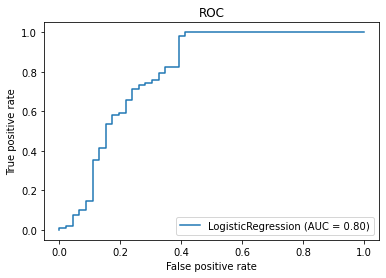

In [156]:
plot_roc_curve(lr_mod,x_test,y_test)
plt.title('ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

Here we can see, with logistic regression, the area under the curve is found to be 80%

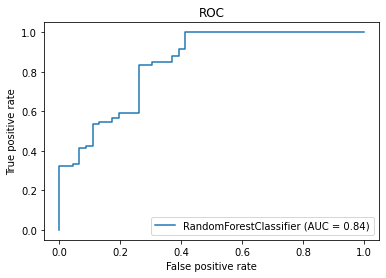

In [157]:
plot_roc_curve(fr_mod,x_test,y_test)
plt.title('ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

With Random forest classifier, the area under the curve is found to be 84%

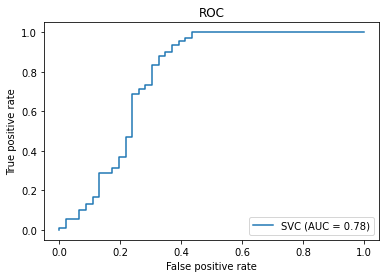

In [158]:
plot_roc_curve(sv_mod,x_test,y_test)
plt.title('ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

Support vector is giving us the area under the curve of 78%

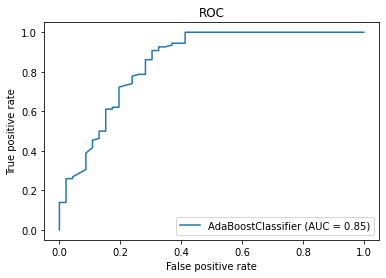

In [159]:
plot_roc_curve(ad_mod,x_test,y_test)
plt.title('ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

Adaboost is giving us the area under the curve of 85%

By analysing all the models we have found that Adaboost classifier is giving us a high f1 score as well as a high AUC value as compared to other models, So we make AdaBoost classifier as our final model.

## Saving the model

In [161]:
import joblib

joblib.dump(ad_mod,'loan_app_status.pkl')

['loan_app_status.pkl']